<a href="https://colab.research.google.com/github/Nanirudh/ML-Assignments/blob/main/mlBookAssignments/KerasMnistDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashon_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_full), (x_test, y_test) = fashon_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_valid, x_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0

In [7]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
y_valid

array([9, 0, 0, ..., 5, 8, 3], dtype=uint8)

In [10]:
y_valid.shape

(5000,)

In [11]:
class_names = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
tf.__version__

'2.5.0'

In [14]:
keras.__version__

'2.5.0'

In [15]:
import matplotlib.pyplot as plt

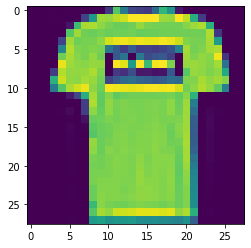

In [18]:
plt.imshow(x_valid[1])

In [20]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28,28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [24]:
weights.shape

(784, 300)

In [27]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [28]:
history = model.fit(x_train, y_train,epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7125 - accuracy: 0.7652 - val_loss: 0.4956 - val_accuracy: 0.8356
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4834 - accuracy: 0.8313 - val_loss: 0.4490 - val_accuracy: 0.8484
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4368 - accuracy: 0.8464 - val_loss: 0.4369 - val_accuracy: 0.8440
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4103 - accuracy: 0.8569 - val_loss: 0.3981 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3917 - accuracy: 0.8628 - val_loss: 0.4039 - val_accuracy: 0.8542
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3772 - accuracy: 0.8673 - val_loss: 0.3652 - val_accuracy: 0.8700
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3636 - accuracy: 0.8711 - val_loss: 0.3680 - val_accuracy:

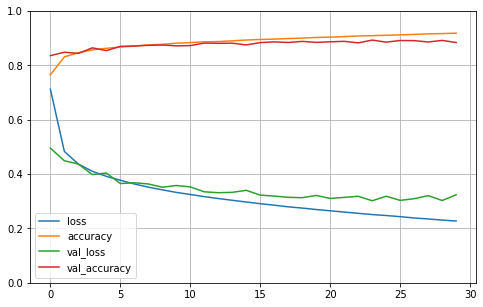

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [31]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 63.8807 - accuracy: 0.8534


[63.880706787109375, 0.8533999919891357]

In [33]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [34]:
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
y_proba.shape

(3, 10)